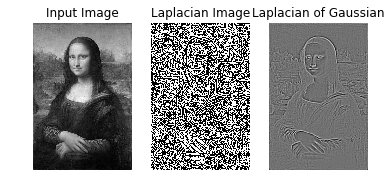

In [18]:
import numpy as np 
import matplotlib.pyplot as plt 
import cv2 
%matplotlib inline 

def _plot_cv_img(input_image, output_image1, output_image2):     
    """     
    Converts an image from BGR to RGB and plots     
    """   

    fig, ax = plt.subplots(nrows=1, ncols=3)

    ax[0].imshow(input_image, cmap='gray')          
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    
    ax[1].imshow(output_image1, cmap='gray')          
    ax[1].set_title('Laplacian Image')
    ax[1].axis('off')

    ax[2].imshow(output_image2, cmap = 'gray')          
    ax[2].set_title('Laplacian of Gaussian')
    ax[2].axis('off')    

    #ax[3].imshow(output_image3, cmap = 'gray')          
    #ax[3].set_title('Sharpened Image')
    #ax[3].axis('off')
    
    plt.savefig('pics/monalisa_derivatives.jpg')

    plt.show()
    

def main():
    # read an image 
    img = cv2.imread('pics/monalisa.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    
    
    # Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise
    x_sobel = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
    y_sobel = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

    # Laplacian Derivatives
    lapl = cv2.Laplacian(img,cv2.CV_64F, ksize=5)

    # gaussian blur
    blur = cv2.GaussianBlur(img,(5,5),0)
    # laplacian of gaussian
    log = cv2.Laplacian(blur,cv2.CV_64F, ksize=5)
    
    res = np.hstack([img, x_sobel, y_sobel])
    #plt.imshow(res, cmap='gray')
    #plt.axis('off')
    #plt.show()
    lapl = np.asarray(lapl, dtype= np.uint)
    # Do plot
    _plot_cv_img(img, lapl, log)

if __name__ == '__main__':
    main()
